In [1]:
import nltk
import os
import string
from HMM import supervised_HMM, unsupervised_HMM, HiddenMarkovModel
import re
import numpy as np
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    visualize_sparsities,
    animate_emission
)
from tqdm import tqdm

In [2]:
def load_poems(filename):
    
    lines = [] # 2d dictionary, each array is a split + cleaned line
    words = {} # dictionary of a word, and its frequency
    
    file = open(filename, 'r')
    
    for line in file:
        line = line.strip()
        if  len(line) < 10:
            # Too short to be a valid line
            continue
        line = "".join(l for l in line if l not in string.punctuation)
        line = line.lower()
        line = line.split()
        
        lines.append(line)

        for word in line:
            try:
                # add to frequency if the word is already in the dic
                words[word] += 1
            except KeyError:
                # if not, add the word to the dic
                words[word] = 1
    return lines, words

In [3]:
file = "data/shakespeare.txt"
lines, words = load_poems(file)

In [4]:
def obs_map_reverser(obs_map):
    obs_map_r = {}

    for key in obs_map:
        obs_map_r[obs_map[key]] = key

    return obs_map_r

In [5]:
def parse_observations(lines):

    obs_counter = 0
    obs = []
    obs_map = {}

    for line in lines:
        obs_elem = []

        for word in line:
            word = re.sub(r'[^\w]', '', word).lower()
            if word not in obs_map:
                # Add unique words to the observations map.
                obs_map[word] = obs_counter
                obs_counter += 1

            # Add the encoded word.
            obs_elem.append(obs_map[word])

        # Add the encoded sequence.
        obs.append(obs_elem)

    return obs, obs_map

In [6]:
# get syllable info from syllable_dictionary.txt
def load_syllables(filename):
    file = open(filename, 'r')
    syllable = {}
    for line in file:
        line = line.split()
        #print(line)
        word = line[0]
        rest = line[1: len(line)]

        syllable[word] = rest
    return syllable

In [7]:
filename = "data/Syllable_dictionary.txt"
syllable = load_syllables(filename)

In [8]:
def save_HMM(hmmmmmm, filename):
    
    with open(filename+".txt", "w+") as filept:
        filept.write(str(hmmmmmm.L)+"\n")
        filept.write(str(hmmmmmm.D)+"\n")
        for i in hmmmmmm.A:
            line = ""
            for j in i:
                line += str(j) + ","
            filept.write(line[:len(line)-1]+"\n")
        for i in hmmmmmm.O:
            line = ""
            for j in i:
                line += str(j) + ","
            filept.write(line[:len(line)-1]+"\n")
        

def read_HMM(filename):
    with open(filename+".txt", "r") as filept:
        L = int(filept.readline())
        D = int(filept.readline())
        O = []
        A = []
        for i in range(L):
            line = [float(x) for x in filept.readline().split(",")]
            A.append(line)
        for j in range(L):
            line = [float(x) for x in filept.readline().split(",")]
            O.append(line)
    return HiddenMarkovModel(A, O)

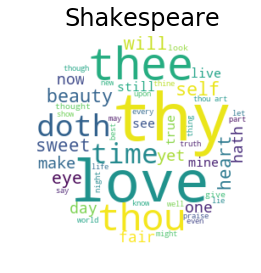

In [9]:
text = open(os.path.join(os.getcwd(), 'data/shakespeare.txt')).read()
wordcloud = text_to_wordcloud(text, title='Shakespeare')

In [10]:
# run full model - 12 states
obs, obs_map =  parse_observations(lines)
obs_map_r = obs_map_reverser(obs_map)

In [11]:
states = [12]

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

Training 12-state model...
merp 0
merp 1
merp 2
merp 3
merp 4
merp 5
merp 6
merp 7
merp 8
merp 9
merp 10
merp 11
merp 12
merp 13
merp 14
merp 15
merp 16
merp 17
merp 18
merp 19
merp 20
merp 21
merp 22
merp 23
merp 24
merp 25
merp 26
merp 27
merp 28
merp 29
merp 30
merp 31
merp 32
merp 33
merp 34
merp 35
merp 36
merp 37
merp 38
merp 39
Model training complete!
Sample sonnet:
Bareness to the lines wherein as love for
Pen good beauteous be do fair wear were for
Breath ten best skill i most made to in the
When many losses minutes jealousy still
Poor mine hope to triumphant in true self
Grew set doth do that seemed summers my this
And stands the more hope forged parts spent that
Thee be i hath if and our his of shade
Age they no even pleasure eyes plot holy
To an is former mind respects new he
Stay ruined record never and is and
Their all brow the in critic deserts thou
Then be was whom old and so judgment you
Beauty that when the worst my wrong themes needs
Sparsity graphs:


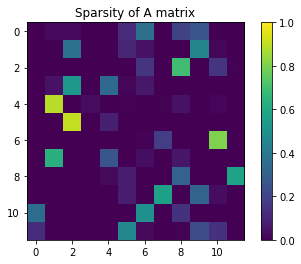

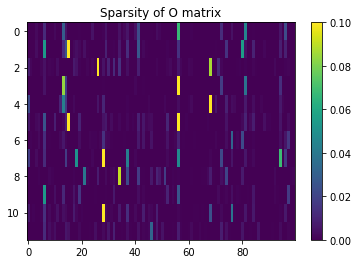

State wordclouds


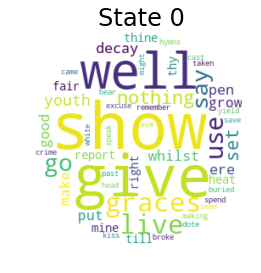

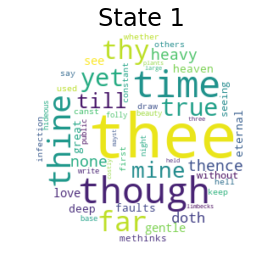

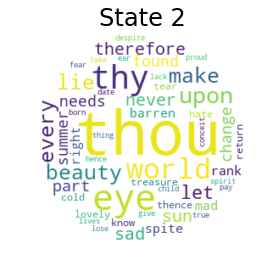

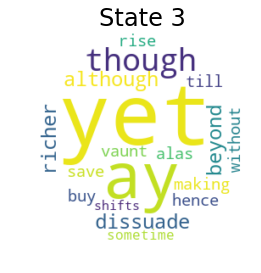

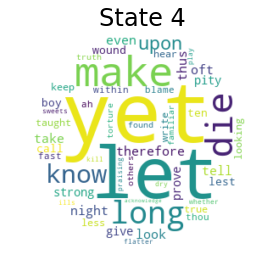

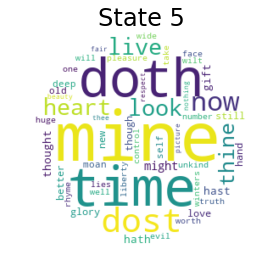

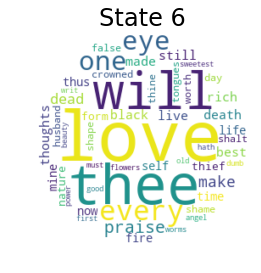

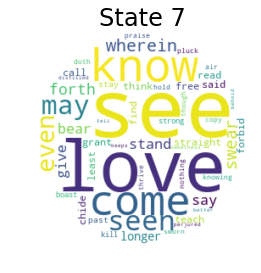

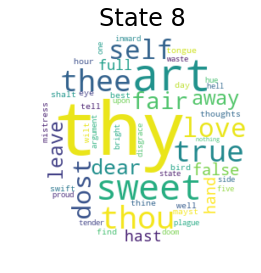

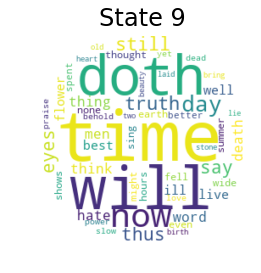

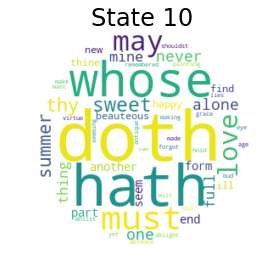

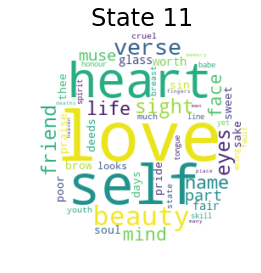

100%|██████████████████████████████████████████████████████████████████████████████| 1/1 [17:45:09<00:00, 63909.21s/it]


In [12]:
for j in tqdm(range(len(states))):
    print (f'Training {states[j]}-state model...')
    # for each state number, train a model
    hmm  = unsupervised_HMM(obs, states[j], 40)
    # save the model
    name = f'40-iter-{states[j]}-hidden-hmm'
    save_HMM(hmm, name)
    
    print ('Model training complete!')
    print ('Sample sonnet:')
    
    # make a sample poem
    for i in range(14): # each poem is 14 lines long
        emission = hmm.generate_emission_syllables_correct(10, obs_map_r, syllable) # each line is 10 syllables long
        sentence = [obs_map_r[i] for i in emission[0]]

        print(' '.join(sentence).capitalize())
    
    print ('Sparsity graphs:')
    # look at sparsity graphs
    visualize_sparsities(hmm, O_max_cols=100)
    
    print ('State wordclouds')
    # look at state wordclouds
    wordclouds = states_to_wordclouds(hmm, obs_map, syllable)
    
    print ('\n\n')

In [12]:
def reverse_list(lines):
    for i, val in enumerate(lines):
        lines[i].reverse()
    return lines

In [13]:
r_lines = reverse_list(lines)

In [14]:
r_obs, r_obs_map =  parse_observations(r_lines)
r_obs_map_r = obs_map_reverser(r_obs_map)

In [15]:
for j in tqdm(range(len(states))):
    print (f'Training {states[j]}-state reversed model...')
    # for each state number, train a model
    r_hmm  = unsupervised_HMM(r_obs, states[j], 40)
    # save the model
    name = f'r-40-iter-{states[j]}-hidden-hmm'
    save_HMM(r_hmm, name)
    
    print ('Model training complete!')
    print ('Sample sonnet:')
    
    # make a sample poem
    sonn = [''] * 14
    for i in inds: # each poem is 14 lines long, with 7 rhymes
        word = ''
        word2 = ''
        while len(word)==0 and len(word2)==0:
            word = np.random.choice(list(all_pairs_dict.keys()))
            words = all_pairs_dict[word]
            word2 = np.random.choice(words)
            try:
                a = syllable[word]
                b = syllable[word2]
            except KeyError:
                word = ''
                word2 = ''
        emission1 = r_hmm.generate_emission_syllables_rhymes(10, r_obs_map_r, syllable, r_obs_map[word]) # each line is 10 words long
        emission2 = r_hmm.generate_emission_syllables_rhymes(10, r_obs_map_r, syllable, r_obs_map[word2])
        sentence1 = [r_obs_map_r[i] for i in emission1[0]]
        sentence2 = [r_obs_map_r[i] for i in emission2[0]]

        sonn[i] = ' '.join(sentence1).capitalize()
        if i != 12:
            sonn[i+2] = ' '.join(sentence2).capitalize()
        else:
            sonn[i+1] = ' '.join(sentence2).capitalize()
        
    for s in range(len(sonn)):
        sonn[s] = sonn[s].lower().split()

    actual_sonn = reverse_list(sonn)

    for s in range(len(actual_sonn)):
        actual_sonn[s] = ' '.join(actual_sonn[s]).capitalize()

    res = '\n'.join(actual_sonn)
    
    print (res)
    
    print ('Sparsity graphs:')
    # look at sparsity graphs
    visualize_sparsities(r_hmm, O_max_cols=100)
    
    print ('Not printing state wordclouds right now since the function needs to be modified for rhymes')
    # print ('State wordclouds')
    # look at state wordclouds
    # wordclouds = states_to_wordclouds(r_hmm, r_obs_map, syllable)
    
    print ('\n\n')

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

Training 12-state reversed model...
merp 0
merp 1
merp 2
merp 3
merp 4
merp 5
merp 6
merp 7
merp 8
merp 9
merp 10
merp 11
merp 12
merp 13
merp 14
merp 15
merp 16
merp 17
merp 18
merp 19
merp 20
merp 21
merp 22
merp 23
merp 24
merp 25
merp 26
merp 27
merp 28
merp 29
merp 30
merp 31
merp 32
merp 33
merp 34
merp 35
merp 36
merp 37
merp 38
merp 39
Model training complete!
Sample sonnet:


NameError: name 'inds' is not defined

In [16]:
inds = [0,1,4,5,8,9,12]

In [17]:
r_hmm = read_HMM('r-40-iter-12-hidden-hmm')

In [19]:
def script():
    file = open("data/shakespeare.txt", 'r')
    throwaway = [98, 125, 144]
    sonnet_counter = 0
    i = 0
    all_pairs = []
    temp = [[] for _ in range(7)]
    for line in file:
        line = line.strip()
        if len(line) < 10:
            # Too short to be a valid line
            if i != 0:
                if sonnet_counter not in throwaway:
                    all_pairs.extend(temp)
                sonnet_counter += 1
                i = 0
                temp = [[] for _ in range(7)]
            continue
        line = "".join(l for l in line if l not in string.punctuation)
        line = line.lower()
        line = line.split()
        
        last = line[-1]
        
        if i == 0 or i == 2:
            # a
            temp[0].append(last)
        elif i == 1 or i == 3:
            #b
            temp[1].append(last)
        elif i==4 or i==6:
            #c
            temp[2].append(last)
        elif i==5 or i==7:
            #d
            temp[3].append(last)
            
        elif i==8 or i==10:
            #e
            temp[4].append(last)
            
        elif i==9 or i==11:
            #f
            temp[5].append(last)
            
        elif i==12 or i==13:
            #g
            temp[6].append(last)
            
        i += 1
        lines.append(line)

                
    all_pairs_dict = {}
    for i, j in all_pairs:
        if i not in all_pairs_dict:
                    all_pairs_dict[i] = [j]
                
        if j not in all_pairs_dict:
                    all_pairs_dict[j] = [i]
                
        # checking all against all other pairs
        for k in all_pairs:
            # If i or j is in k, this means we need to add things
            if i in k or j in k:
                for a in k:
                    if a not in all_pairs_dict[i] and a != i:
                        all_pairs_dict[i].append(a)
                    if a not in all_pairs_dict[j] and a != j:
                        all_pairs_dict[j].append(a)
           
    # Completing the graph. 
    for key, val in all_pairs_dict.items():
        for i in val:
            if key not in all_pairs_dict[i]:
                all_pairs_dict[i].append(key)
            for j in val:
                if j != i and j not in all_pairs_dict[i]:
                    all_pairs_dict[i].append(j)
                    
    return all_pairs, all_pairs_dict

In [20]:
all_pairs, all_pairs_dict = script()

Sample sonnet:
So love thou certain to him in doth bright
In stand to the a night beweep provide
In mine when for upon thee special sight
And they make graves when determinate chide
Beauty live do huge eye on bear the style
Vulgar remove here of giving thee guard
Do common strive against then thy compile
Fairing sweet child which am thee lives so ward
As travel hid to limits sleep sufficed
Preposterously shine thine too wise her burn
Kind absent no thy thou my says despised
Vows to not rid judgement thy overturn
That love depends of which weakens indeed
With with to the frown loves that be me read
Sparsity graphs:


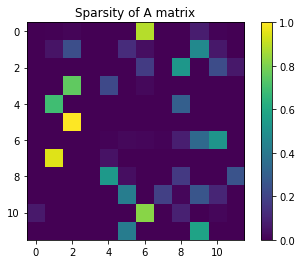

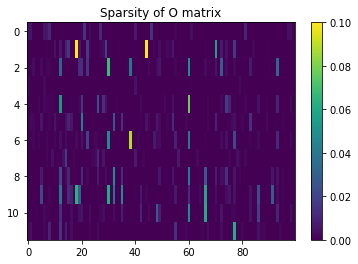

Not printing state wordclouds right now since the function needs to be modified for rhymes





In [23]:
print ('Sample sonnet:')

# make a sample poem
sonn = [''] * 14
for i in inds: # each poem is 14 lines long, with 7 rhymes
    word = ''
    word2 = ''
    while len(word)==0 and len(word2)==0:
        word = np.random.choice(list(all_pairs_dict.keys()))
        words = all_pairs_dict[word]
        word2 = np.random.choice(words)
        try:
            a = syllable[word]
            b = syllable[word2]
        except KeyError:
            word = ''
            word2 = ''
    emission1 = r_hmm.generate_emission_syllables_rhymes(10, r_obs_map_r, syllable, r_obs_map[word]) # each line is 10 words long
    emission2 = r_hmm.generate_emission_syllables_rhymes(10, r_obs_map_r, syllable, r_obs_map[word2])
    sentence1 = [r_obs_map_r[i] for i in emission1[0]]
    sentence2 = [r_obs_map_r[i] for i in emission2[0]]

    sonn[i] = ' '.join(sentence1).capitalize()
    if i != 12:
        sonn[i+2] = ' '.join(sentence2).capitalize()
    else:
        sonn[i+1] = ' '.join(sentence2).capitalize()

for s in range(len(sonn)):
    sonn[s] = sonn[s].lower().split()

actual_sonn = reverse_list(sonn)

for s in range(len(actual_sonn)):
    actual_sonn[s] = ' '.join(actual_sonn[s]).capitalize()

res = '\n'.join(actual_sonn)

print (res)

print ('Sparsity graphs:')
# look at sparsity graphs
visualize_sparsities(r_hmm, O_max_cols=100)

print ('Not printing state wordclouds right now since the function needs to be modified for rhymes')
# print ('State wordclouds')
# look at state wordclouds
# wordclouds = states_to_wordclouds(r_hmm, r_obs_map, syllable)

print ('\n\n')